In [20]:
import matplotlib.pyplot as plt
import numpy as np
from fh_uncertainty import generate_uncertain_sets
import synlabel.utils.helper_functions as hf

import random
# Enables automatic reloading of (locally installed) packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
random.seed(10000)

In [22]:
dataset_dict, mtvd_dict, feature_ranking, noise_levels = generate_uncertain_sets()

noise levels: [0.17 0.36 0.45]


In [23]:
show_plot = False
n_best = 1, 2
size, alpha = 35, 0.85

plot_dict = {}

rgb_order = [0, 1, 3]

plot_points = np.where(
    dataset_dict["D_PG_identity"].X[:, feature_ranking[n_best[0]]] < 2
)[0]
colors = dataset_dict["D_PG_identity"].y[:, rgb_order]

plot_dict[(0, 1)] = (
    dataset_dict["D_PG_identity"].X[:, feature_ranking[n_best[0]]][plot_points],
    dataset_dict["D_PG_identity"].X[:, feature_ranking[n_best[1]]][plot_points],
    colors[plot_points],
    dataset_dict["D_PG_identity"].y[plot_points],
)

if show_plot:
    plt.scatter(
        plot_dict[(0, 1)][0],
        plot_dict[(0, 1)][1],
        c=plot_dict[(0, 1)][2],
        alpha=alpha,
        s=size,
    )
    plt.show()

# The FH results
idx = 1
for n_features, set_name in zip([8, 11, 13], ["D_PG_1", "D_PG_2", "D_PG_3"]):

    original_set = dataset_dict["D_PG_identity"]
    temp_set = dataset_dict[set_name]
    n_features_to_hide = n_features
    print(feature_ranking)
    features_to_hide = feature_ranking[-n_features_to_hide:].astype(int).tolist()
    print(features_to_hide)
    remaining_features = [
        i for i in range(original_set.X.shape[1]) if i not in features_to_hide
    ]
    print(remaining_features)
    top_two_features = feature_ranking[: original_set.X.shape[1] - n_features_to_hide]
    top_two_new_indices = [remaining_features.index(i) for i in top_two_features]
    print(top_two_new_indices)

    colors = temp_set.y[:, rgb_order]
    colors = np.clip(colors, 0, 1)

    plot_dict[(idx, 0)] = (
        temp_set.X[:, top_two_new_indices[n_best[0]]][plot_points],
        temp_set.X[:, top_two_new_indices[n_best[1]]][plot_points],
        colors[plot_points],
        temp_set.y[plot_points],
    )

    if show_plot:
        plt.scatter(
            plot_dict[(idx, 0)][0],
            plot_dict[(idx, 0)][1],
            c=plot_dict[(idx, 0)][2],
            alpha=alpha,
            s=size,
        )
        plt.show()
    idx += 1

idx_type = 1
for noise_type in ["uniform", "random"]:
    idx_level = 1
    for noise_level in ["1", "2", "3"]:

        temp_set = dataset_dict[f"D_PG_{noise_type}_{noise_level}"]

        # For the noise
        colors = temp_set.y[:, rgb_order]

        plot_dict[(idx_level, idx_type)] = (
            dataset_dict["D_PG_identity"].X[:, feature_ranking[n_best[0]]][plot_points],
            dataset_dict["D_PG_identity"].X[:, feature_ranking[n_best[1]]][plot_points],
            colors[plot_points],
            temp_set.y[plot_points],
        )

        if show_plot:
            plt.scatter(
                plot_dict[(idx_level, idx_type)][0],
                plot_dict[(idx_level, idx_type)][1],
                c=plot_dict[(idx_level, idx_type)][2],
                alpha=alpha,
                s=size,
            )
            plt.show()

        idx_level += 1
    idx_type += 1

[ 5 11  9 10  6  7  0 13  2  4 17  3 16 15 14 12  1  8]
[17, 3, 16, 15, 14, 12, 1, 8]
[0, 2, 4, 5, 6, 7, 9, 10, 11, 13]
[3, 8, 6, 7, 4, 5, 0, 9, 1, 2]
[ 5 11  9 10  6  7  0 13  2  4 17  3 16 15 14 12  1  8]
[13, 2, 4, 17, 3, 16, 15, 14, 12, 1, 8]
[0, 5, 6, 7, 9, 10, 11]
[1, 6, 4, 5, 2, 3, 0]
[ 5 11  9 10  6  7  0 13  2  4 17  3 16 15 14 12  1  8]
[7, 0, 13, 2, 4, 17, 3, 16, 15, 14, 12, 1, 8]
[5, 6, 9, 10, 11]
[0, 4, 2, 3, 1]


From the plot_dict, now sample to obtain a representation to how the hard labels have shifted

In [24]:
final_keys = [(3, 0), (3, 1), (3, 2)]
sample_dict = {}
for key in final_keys:

    sampled_hard_labels = np.apply_along_axis(
        lambda x: np.random.choice([0, 1, 2, 3], 1, False, x), 1, plot_dict[key][3]
    )

    distributed_hard_label = hf.one_hot_encoding(sampled_hard_labels)
    colors = distributed_hard_label[:, rgb_order]

    new_key = (key[0] + 1, key[1])

    plot_dict[new_key] = (
        plot_dict[key][0],
        plot_dict[key][1],
        colors,
        distributed_hard_label,
    )

    if show_plot:
        plt.scatter(
            plot_dict[key][0],
            plot_dict[key][1],
            c=colors,
            alpha=alpha,
            s=size,
        )
        plt.show()

C:\Users\4001214\AppData\Local\Temp\ipykernel_17568\1020255694.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.9, 0.93])


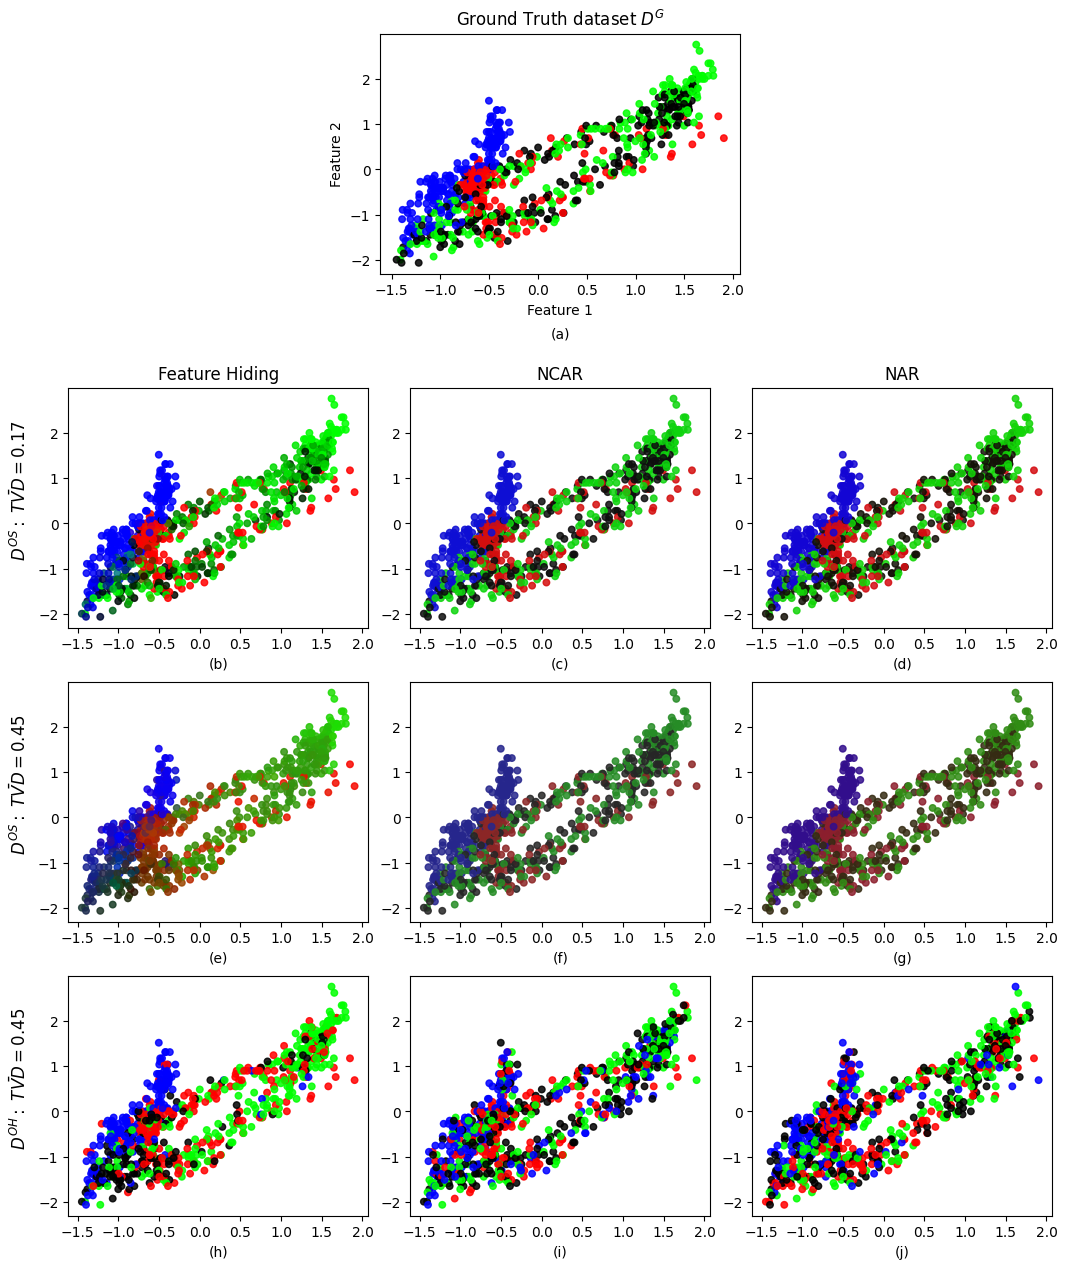

In [30]:
alpha = 0.85
size = 22

# Create a figure
fig = plt.figure(figsize=(12, 12))

# Define positions for subplots
top_subplot_pos = [0.35, 0.795, 0.3, 0.2]  # [left, bottom, width, height]
bottom_subplot_positions = [
    [0.09, 0.5, 0.25, 0.2],
    [0.375, 0.5, 0.25, 0.2],
    [0.66, 0.5, 0.25, 0.2],
    [0.09, 0.255, 0.25, 0.2],
    [0.375, 0.255, 0.25, 0.2],
    [0.66, 0.255, 0.25, 0.2],
    [0.09, 0.01, 0.25, 0.2],
    [0.375, 0.01, 0.25, 0.2],
    [0.66, 0.01, 0.25, 0.2],
]

# Add the middle top subplot (middle of the first row)
ax1 = fig.add_axes(top_subplot_pos)
ax1.set_title(r"Ground Truth dataset $D^{G}$")
ax1.set_xlabel("Feature 1", fontsize=10)
ax1.set_ylabel("Feature 2", fontsize=10)
fig.text(
    0.5,
    0.745,
    "(a)",
    ha="center",
    va="center",
    fontsize=10,
)

# Add the remaining subplots (3x3 grid starting from the 4th position)
axes = [fig.add_axes(pos) for pos in bottom_subplot_positions]

# Plot example data in the top subplot
ax1.scatter(
    plot_dict[(0, 1)][0],
    plot_dict[(0, 1)][1],
    c=plot_dict[(0, 1)][2],
    alpha=alpha,
    s=size,
)

# Plot example data in the remaining subplots
idx = 0
keys_to_plot = [(1, 0), (1, 1), (1, 2), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2)]
title_dict = {(1, 0): "Feature Hiding", (1, 1): "NCAR", (1, 2): "NAR"}
# construct a list from b to j
x_labels = ["(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)", "(j)"]

for ax in axes:

    temp_key = keys_to_plot[idx]

    ax.scatter(
        plot_dict[temp_key][0],
        plot_dict[temp_key][1],
        c=plot_dict[temp_key][2],
        alpha=alpha,
        s=size,
    )
    ax.set_xticks(np.arange(-1.5, 2.5, 0.5))
    ax.set_xlabel(x_labels[idx], fontsize=10)

    if temp_key in title_dict.keys():
        ax.set_title(title_dict[temp_key])

    idx += 1

# Add a big axis, hide frame
big_ax = fig.add_subplot(111, frameon=False)
# Hide tick and tick labels of the big axis
big_ax.tick_params(labelcolor="none", top=False, bottom=False, left=False, right=False)

# Set common labels using fig.text for precise positioning
fig.text(
    0.05,
    0.615,
    r"$D^{OS}:\   \bar{TVD} = $" + str(noise_levels[0]),
    ha="center",
    va="center",
    rotation="vertical",
    fontsize=12,
)
fig.text(
    0.05,
    0.37,
    r"$D^{OS}:\   \bar{TVD} = $" + str(noise_levels[2]),
    ha="center",
    va="center",
    rotation="vertical",
    fontsize=12,
)
fig.text(
    0.05,
    0.125,
    r"$D^{OH}:\  \bar{TVD} = $" + str(noise_levels[2]),
    ha="center",
    va="center",
    rotation="vertical",
    fontsize=12,
)

# Adjust layout for better spacing
plt.tight_layout(rect=[0.05, 0.05, 0.9, 0.93])

# Show the plot
plt.show()

In [31]:
fig.savefig("fh_uncertainty.png", dpi=600, bbox_inches="tight")

Calculate the entropy of the sets

In [28]:
fh_entropy = hf.average_entropy(dataset_dict["D_PG_3"].y[plot_points])
uniform_entropy = hf.average_entropy(dataset_dict["D_PG_uniform_3"].y[plot_points])
random_entropy = hf.average_entropy(dataset_dict["D_PG_random_3"].y[plot_points])

In [29]:
print(f"avg entropy FH {fh_entropy}")
print(f"avg uniform {uniform_entropy}")
print(f"avg random {random_entropy}")

avg entropy FH 0.9020697947796605
avg uniform 1.1825143436142376
avg random 1.1521984207874645
